Import knihoven


In [80]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [81]:
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [82]:
model = YOLO('yolov8m.pt')

Pokud chci hledat urcity objekt zjisti jeho id

In [83]:
searched_object = 'pottedplant'
object_id = classNames.index(searched_object)# zjisti class id objektu co hledam
print(object_id)

58


nacte a zobrazy zvoleny obrazek

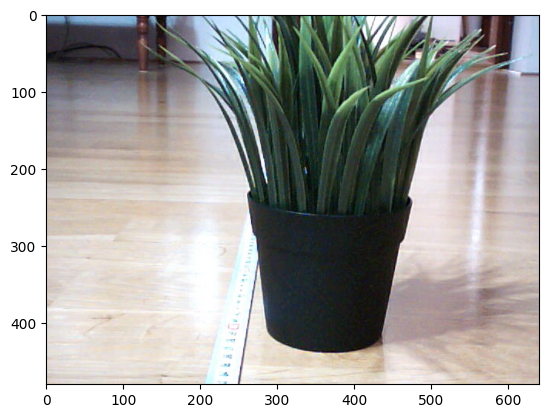

In [84]:
img = cv2.imread('1.jpg')
#cv2.imshow('picture',img)
#cv2.waitKey(2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

zjisti velikost obrazku 

In [85]:
img_height,img_width,img_channels = img.shape
print('width',img_width,'Px')
print('height',img_height,'Px')
print('channels',img_channels)

width 640 Px
height 480 Px
channels 3


pouziti modelu na nalezeni objektu

In [86]:
results = model(img)



0: 480x640 1 potted plant, 1 dining table, 1 vase, 364.5ms
Speed: 0.0ms preprocess, 364.5ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)


vykresleni jednotlivych objektu na obrazek

In [87]:
objects_ids = []#list pro uchovavani id nalezenych objektu 
objects_centers = []#list pro uchovavani souradnic stredu nalezenych objektu
objects_heights = []# list for objects height 
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#zjisti classu objektu
            print(classNames[cls])#vypise klassu objektu slovem
            #print(cls) #vypise classu objektu jako id
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu 
            cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,255),thickness=2 )#vykresli na video primku stredem videa 

vase
X= 259 Y= 233 W= 477 H= 440
center: 368 336
confidence: 85
pottedplant
X= 113 Y= 0 W= 636 H= 439
center: 374 219
confidence: 77
diningtable
X= 33 Y= 71 W= 637 H= 476
center: 335 273
confidence: 36


array([[[204, 168, 138],
        [206, 170, 140],
        [210, 172, 140],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [222, 190, 171]],

       [[201, 166, 133],
        [203, 168, 135],
        [207, 170, 136],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [223, 191, 172]],

       [[200, 164, 126],
        [201, 165, 127],
        [203, 167, 129],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [225, 193, 174]],

       ...,

       [[203, 213, 220],
        [202, 212, 219],
        [201, 210, 219],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [183, 195, 207]],

       [[195, 211, 218],
        [194, 210, 217],
        [194, 209, 218],
        ...,
        [255,   0, 255],
        [173, 187, 205],
        [172, 186, 204]],

       [[187, 206, 213],
        [187, 206, 213],
        [187, 206, 214],
        ...,
        [176, 189, 211],
        [173, 187, 209],
        [171, 185, 207]]

vypise id nalezenych objektu 

In [88]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[75, 58, 60]
[(368, 336), (374, 219), (335, 273)]
[440, 439, 476]


hledani urciteho objektu

In [91]:
a = objects_ids.index(58)#v listu object_ids hleda urcite cislo a vypise jeho index
print(a)
x,y=objects_centers[a]# v listu object centers hleda pro dany index hodnoty
print(x,y)
center_line = int(img_width/2)# x souradnice primky zobrazujici stred
object_deviation = center_line-x #odchylka objektu od stredu obrazovky
print('deviation = ',object_deviation) 
h = objects_heights[a]
print(h)
distance = h-439
print(distance)



1
374 219
deviation =  -54
439
0


ukaze obrazek

tensor([[2.5922e+02, 2.3321e+02, 4.7799e+02, 4.4080e+02, 8.5501e-01, 7.5000e+01],
        [1.1390e+02, 5.7016e-01, 6.3671e+02, 4.3916e+02, 7.7645e-01, 5.8000e+01],
        [3.3181e+01, 7.1178e+01, 6.3764e+02, 4.7685e+02, 3.6663e-01, 6.0000e+01]])


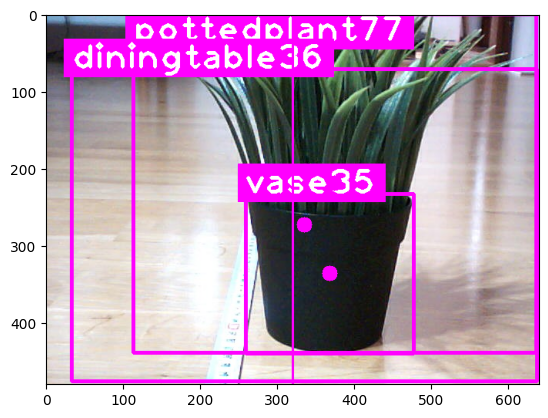

In [90]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
